In [1]:
from polpymer.core_funcs import Polymer, Monomer, Dish
from polpymer.data_funcs import plot_polymer, grow_polymer, \
     generate_N_polymers, expect_observ, error_observ
import numpy as np
import matplotlib.pyplot as plt

In [3]:
""" We can start a new Polymer object with a starting Monomer(angle) where angle is {0,1,2,3} for 0*90, 1*90, 2*90, 3*90 degrees

Here we start the chain with a monomer to the right
"""
first_monomer = Monomer(0)

polymer = Polymer((10,10), (5,5))
print(first_monomer.end_location)

None


In [4]:
print(polymer.chain_end)
print(polymer.chain_start)

(6, 5)
(5, 5)


In [5]:
polymer.add_monomer(3) # add monomer down
print(polymer.chain_end)

(6, 4)


In [6]:
"""
Since we dont want our Polymer to close we see that we get an arrow if we now
add further monomers that go to the left and up again
"""

polymer.add_monomer(2) # add monomer to the left
print(polymer.chain_end)
try:
    polymer.add_monomer(1) # add monomer up (should error out)
except:
    print('Could not add monomer')
print(polymer.chain_end)

(5, 4)
Could not add monomer
(5, 4)


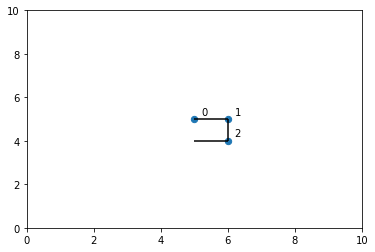

In [7]:
plot_polymer(polymer)

In [8]:
for monomer in polymer:
    print(monomer, "angle = {}".format(monomer.angle))

Monomer from (5, 5) to (6, 5) angle = 0
Monomer from (6, 5) to (6, 4) angle = 3
Monomer from (6, 4) to (5, 4) angle = 2


In [9]:
polymer1 = Polymer((10,10), (5,5))

In [10]:
from random import randint

random_angles = [randint(0,3) for i in range(10)]

for i in random_angles:
    polymer1.add_monomer(i)

Exception: Proposed monomer's end location already a node of polymer

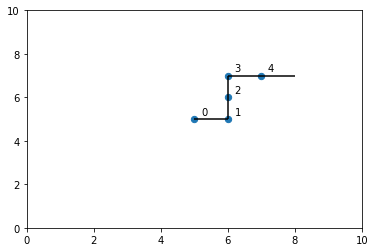

In [11]:
plot_polymer(polymer1)

In [14]:
m, polymer2 = grow_polymer((20,20), (10,10), 200)
m

The polymer grew to length 99


array([3., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 3., 3., 3., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 2., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 2., 3.,
       3., 3., 3., 3., 3., 2., 2., 3., 3., 3., 2., 2., 1., 3., 1., 3., 2.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 2., 1., 3., 2., 1., 1., 1.])

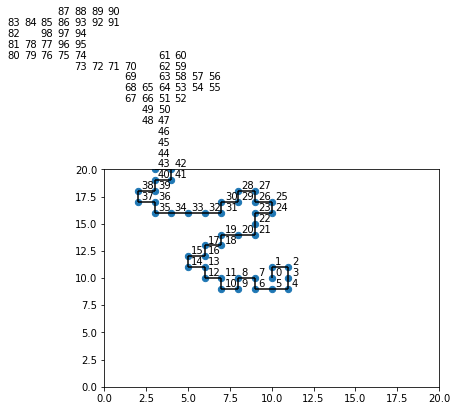

In [15]:
plot_polymer(polymer2)

In [16]:
polymer2.chain_length

99

In [17]:
"""
run test to check if behaviour is as expected for random polymers of length 1, 2, 3
"""
N = 1000
L = 2
end2end = np.zeros(N)
for i in range(N):
    test_m, testpoly = grow_polymer((10,10), (5,5), L)
    end2end[i] = np.sqrt(testpoly.distance_end_start())

plt.hist(end2end)
plt.savefig('Figures/end2endDistribution_L={}'.format(L))

"Distribution of end to end distances is as expected for these lengths"

AttributeError: 'Polymer' object has no attribute 'distance_end_start'

In [18]:
end_to_end, gyration, weights = generate_N_polymers(70, 10, (10,10), (5,5))
end_to_end_weighted_avg = expect_observ(end_to_end, weights)
end_to_end_err = error_observ(end_to_end, weights, 5)

The polymer grew to length 8


In [31]:
polymer = Polymer((10,10), (5,5))
polymer.grow_polymer(40)

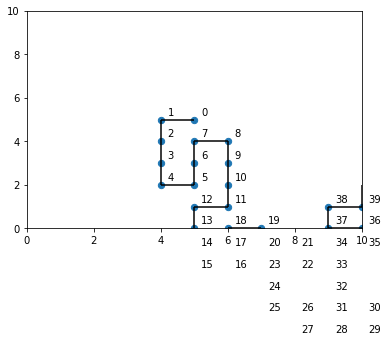

In [32]:
plot_polymer(polymer)

In [33]:
end, gyr = polymer.observables()

In [34]:
print(end)
print(gyr)

[  1.   2.   5.  10.   9.   4.   1.   2.   5.  10.  17.  16.  25.  36.
  49.  50.  37.  26.  29.  40.  45.  58.  53.  68.  85.  90. 109. 116.
 125. 106.  97.  80.  65.  52.  61.  50.  41.  32.  41.]
[ 0.          0.25        0.44444444  0.875       1.52        1.80555556
  1.63265306  1.5         1.58024691  1.61        1.76859504  2.13888889
  2.30769231  2.73979592  3.44888889  4.4375      5.23183391  5.45987654
  5.37950139  5.415       5.61451247  5.94421488  6.43856333  6.67708333
  7.136       7.83579882  8.54046639  9.47704082 10.43995244 11.48111111
 12.08532778 12.39648438 12.45546373 12.36072664 12.19265306 12.18209877
 12.14901388 11.96191136 11.82117028]


In [12]:
dish = Dish((10,10), (5,5))


In [13]:
dish.generate_N_polymers(100, 30)

The polymer grew to length 18
The polymer grew to length 12
The polymer grew to length 16
The polymer grew to length 20
The polymer grew to length 13
The polymer grew to length 9
The polymer grew to length 20
The polymer grew to length 25
The polymer grew to length 8
The polymer grew to length 14
The polymer grew to length 21
The polymer grew to length 13
The polymer grew to length 14
The polymer grew to length 18
The polymer grew to length 18
The polymer grew to length 25
The polymer grew to length 21
The polymer grew to length 19


(array([[  1.,   2.,   1., ...,  13.,  20.,  25.],
        [  1.,   4.,   9., ...,  53.,  40.,  29.],
        [  1.,   2.,   5., ...,  65.,  64.,  65.],
        ...,
        [  1.,   2.,   1., ..., 149., 164., 181.],
        [  1.,   2.,   1., ...,  85.,  72.,  61.],
        [  1.,   2.,   5., ..., 113., 128., 145.]]),
 array([[ 0.        ,  0.25      ,  0.44444444, ...,  5.10836763,
          5.35459184,  5.81450654],
        [ 0.        ,  0.25      ,  0.66666667, ...,  8.89986283,
          8.75255102,  8.5921522 ],
        [ 0.        ,  0.25      ,  0.44444444, ..., 10.25788752,
         10.27040816, 10.39476813],
        ...,
        [ 0.        ,  0.25      ,  0.44444444, ..., 12.30178326,
         13.48469388, 14.8156956 ],
        [ 0.        ,  0.25      ,  0.44444444, ...,  8.66941015,
          9.50765306, 10.        ],
        [ 0.        ,  0.25      ,  0.44444444, ..., 11.15500686,
         12.56632653, 14.22592152]]),
 array([[4.00000000e+00, 1.20000000e+01, 3.60000000e

In [14]:
dish.polymers

 ...]

In [15]:
weights = dish.weights
observ = dish.end_to_end


In [16]:

end_to_end_weighted_avg = expect_observ(observ, weights)
end_to_end_err = error_observ(observ, weights, 5)

In [17]:
def scaling_law(L, dims):
    ls = np.arange(L)+1
    exponent = 2*3/4

    return ls**exponent

In [22]:
exp_behaviour = scaling_law(30, 2)

Text(0.5, 0, 'Polymer length $L$ [$a$]')

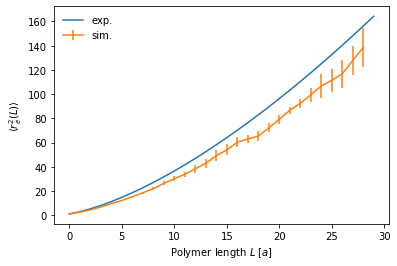

In [24]:
plt.plot(np.arange(30),exp_behaviour, label=r'exp.')
plt.errorbar(np.arange(29), end_to_end_weighted_avg, yerr=end_to_end_err, label=r'sim.')
plt.legend(frameon=False)
plt.ylabel(r"$\langle r_e^2(L) \rangle$")
plt.xlabel(r"Polymer length $L$ [$a$]")